In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  



In [42]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).astype(float)  # квалификация репетитора
               
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

In [44]:
for i in range(1, X.shape[0]):
    X[i] = (X[i] - X[i].mean()) / X[i].std()

In [46]:
def calc_mse(y, y_pred):
    return np.mean((y-y_pred)**2)

In [47]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W)
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [48]:
Ws = {0:[],
      1:[],
      2:[],
      3:[]}
for i in np.arange(1e-3, 1e1, 0.1):
    W = eval_model_reg2(X, y, 1000, 1e-2, i)
    for i in range(4):
            Ws[i].append(W[i])

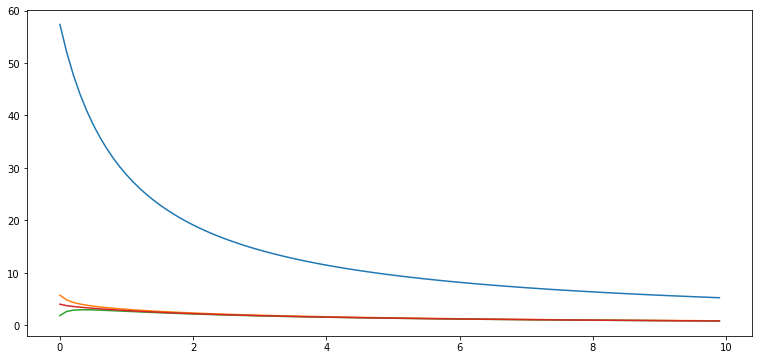

In [49]:
plt.figure(figsize=(13, 6))
# plt.title('Stochastic gradient descent')
# plt.xlabel(r'$w_1$')
# plt.ylabel(r'$w_2$')
plt.plot(np.arange(1e-3, 1e1, 0.1), Ws[0])
plt.plot(np.arange(1e-3, 1e1, 0.1), Ws[1])
plt.plot(np.arange(1e-3, 1e1, 0.1), Ws[2])
plt.plot(np.arange(1e-3, 1e1, 0.1), Ws[3])


### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  



Технически это можно сделать, но фактически эффект будет от последнего примененного метода масштабирования

### 3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [50]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [60]:
eval_model_reg1(X, y, 1000, 1e-2, lambda_=1e-5)

100 [49.85350283  3.66667792  3.48290558  4.46268777] 100.15346091463547
200 [56.39917822  4.16740972  3.16668057  4.31347802] 41.52194484349587
300 [57.26726279  4.55529606  2.89027617  4.20488566] 40.25689095608629
400 [57.38238778  4.86306938  2.65690924  4.1329121 ] 40.08337484272156
500 [57.3976556   5.1079391   2.46013144  4.08693405] 39.98154863974391
600 [57.39968041  5.30326996  2.2943755   4.0591866 ] 39.91468973696803
700 [57.39994894  5.45948613  2.15487729  4.04404164] 39.87030444938707
800 [57.39998456  5.58473759  2.03757177  4.03744465] 39.84062211121196
900 [57.39998928  5.68541183  1.93899898  4.03649632] 39.82064440315272
1000 [57.3999899   5.76652757  1.85622038  4.03914224] 39.807122663174795


array([57.3999899 ,  5.76652757,  1.85622038,  4.03914224])